<a href="https://colab.research.google.com/github/ArincDemirel/PyTorch--Deep-Learning-Projects/blob/main/01_Pytorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01.Pytorch Workflow Fundamentals

Resource Notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [241]:
# PyTorch Workflow


In [242]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for nueral networks
import matplotlib.pyplot as plt

## 1. Data(Preparing and Loading)


In [243]:
## Linear Regression
# Create *known* parameters
weight = 0.7
bias = 0.3

#Creat data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step)
print('x:',x),print(x.shape)
y = weight * x + bias
print('y:',y)

x: tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])
torch.Size([50])
y: tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
        0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
        0.9300, 0.9440, 0.9580, 0.9720, 0.9860])


## Spliting data into training and test


In [244]:
train_split = int(0.8 * len(X))
train_split

40

In [245]:
X_train, y_train = X[:train_split], y[:train_split]
X_train, y_train

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]))

In [246]:
test_split = int(0.2 * len(X))
test_split

10

In [247]:
X_test, y_test = X[-test_split:], y[train_split:] ## or X[-test_split:], y[-test_split:]
X_test, y_test

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

In [248]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [249]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):


    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label = 'Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label = 'Testing data')
    if predictions is not None:
      plt.scatter(test_data, predictions, c='r')
    plt.legend(prop={"size":14});

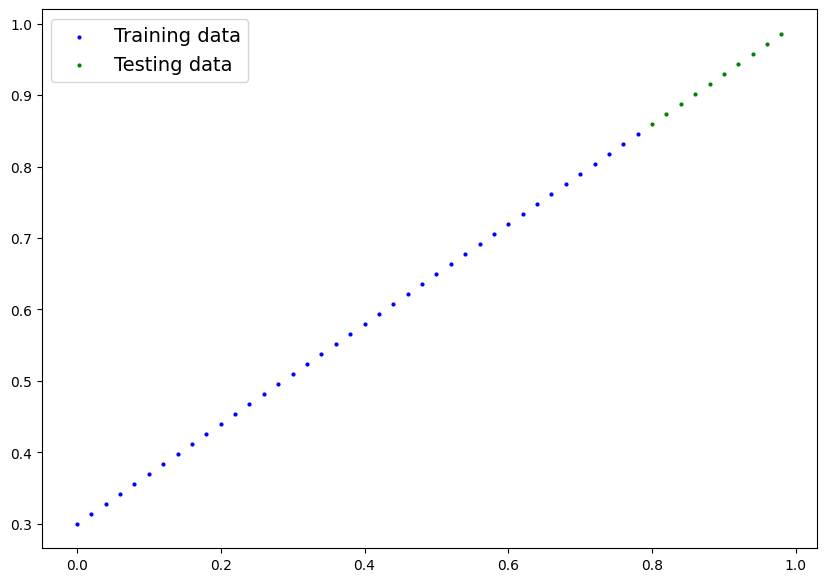

In [250]:
plot_predictions()

In [251]:
# Build this linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype= torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "×" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

In [252]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [253]:
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 0.7,
 0.3)

In [254]:
# Now I am gonna try train the random values that torch calculated for us to fit into the weight and bias I have assigned at the beginning

In [255]:
with torch.inference_mode(): ## Inference mode is gonna keep track of the gradient
  y_preds = model_0(X_test)

y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [256]:
y_test

tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860])

In [257]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


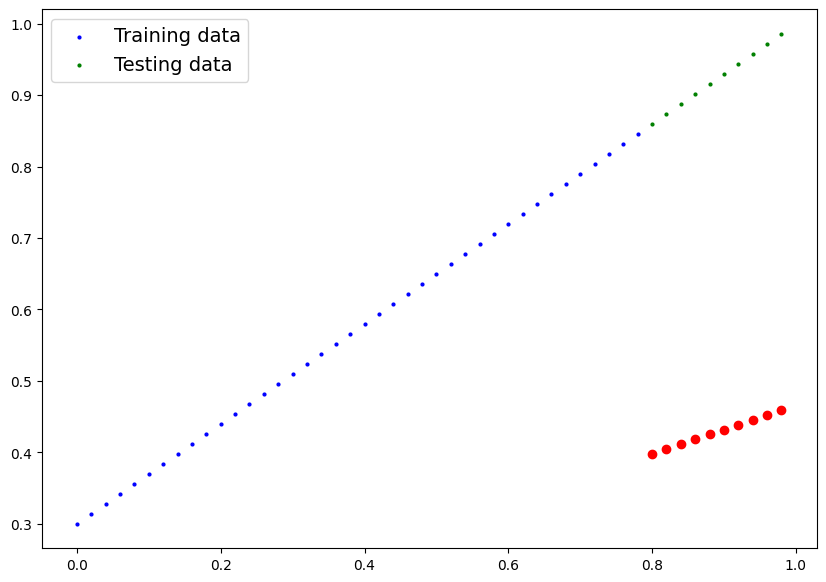

In [258]:
plot_predictions(predictions=y_preds)

In [259]:
y_test - y_preds

tensor([0.4618, 0.4691, 0.4764, 0.4836, 0.4909, 0.4982, 0.5054, 0.5127, 0.5200,
        0.5272])

# The difference is so high, and the results are so bad, will train the model more ...

In [260]:
# Let's calculate MAE_loss

MAE_loss = torch.mean(torch.abs(y_preds - y_test))
MAE_loss

tensor(0.4945)

In [261]:
# or
loss_fn = torch.nn.L1Loss()
loss_fn(y_test, y_preds )


tensor(0.4945)

In [262]:
#Set up optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) # lr learnining rate

### Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:
0. Loop through the data 1
1. Forward pass (this involves data moving through our model's forward()
functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of rach parmeters of our model with respect to the loss
5. Optimizer step - use optimezer to adjust our model's parameters to try and improve the loss

In [263]:
epochs = 5

## loop through in data
for epoch in range(epochs):
  model_0.train() ## set the model to training mode

  y_preds_train = model_0(X_train) ## forwards pass

  loss = loss_fn(y_train, y_preds_train) ## Calculate loss
  print(f"Loss:{loss}")

  optimizer.zero_grad() ## Optimizer zero grad

  loss.backward() ## perform backpropagation

  optimizer.step() # Step the optimizer(perform gradient descent)

  model_0.eval() # turns off gradient tracking(testing step)

  print(f"model params:{model_0.state_dict()}")

Loss:0.31288138031959534
model params:OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss:0.3013603389263153
model params:OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss:0.28983935713768005
model params:OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss:0.2783183455467224
model params:OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss:0.26679736375808716
model params:OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])


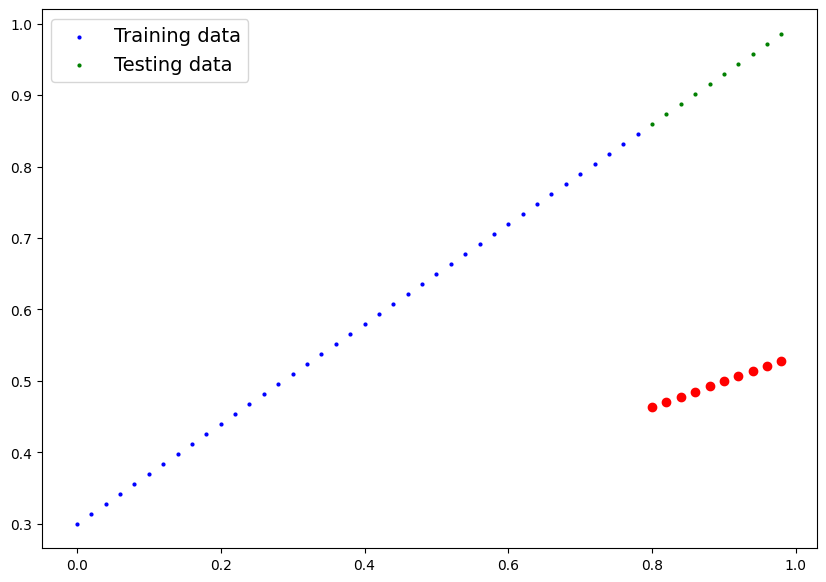

In [264]:
from os import pread
with torch.inference_mode(): ## Inference mode is gonna keep track of the gradient
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

As we can see from the graph the training the model only 5 epochs are decreasing the loss and the red dots are getting closer to our green dots. So fun... :)